In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
# Read in the california housing data set
file = "/Users/williampappas/Desktop/GitLab/01-Class-Activities/05-Matplotlib/4/Activities/03-Stu_Summary_Stats_Python/Resources/California_Housing.csv"
calhouse = pd.read_csv(file)
calhouse.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


In [3]:
# Determine which measure of central tendency is most appropriate to describe the Population
mean_numpy = np.mean(calhouse["Population"])
print(f"The mean population in California is {mean_numpy}")

median_numpy = np.median(calhouse["Population"])
print(f"The median population in California is {median_numpy}")

mode_scipy = sts.mode(calhouse["Population"])
print(f"The mode population in California is {mode_scipy}")

The mean population in California is 1387.9633333333334
The median population in California is 1152.5
The mode population in California is ModeResult(mode=array([1128.]), count=array([8]))


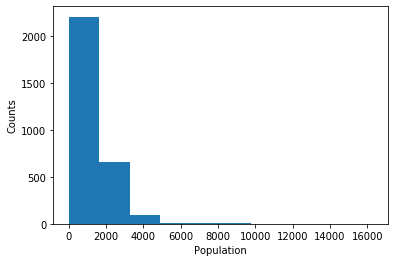

In [4]:
# Determine if the house age in California is considered normally distributed
plt.hist(calhouse["Population"])
plt.xlabel('Population')
plt.ylabel('Counts')
plt.show()

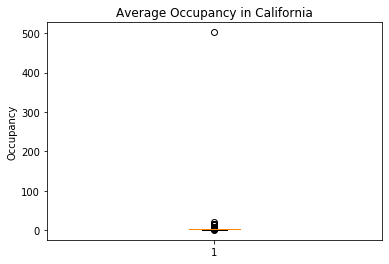

In [9]:
# Determine if there are any potential outliers in the average occupancy in California
occupancy = calhouse["AveOccup"]
fig1, ax1 = plt.subplots()
ax1.set_title('Average Occupancy in California')
ax1.set_ylabel('Occupancy')
ax1.boxplot(occupancy)
plt.show()

In [12]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
quartiles = occupancy.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 2.4250909806040477
The upper quartile of occupancy is: 3.2974592743428355
The interquartile range of occupancy is: 0.8723682937387878
The the median of occupancy is: 2.81970199317512 
Values below 1.116538539995866 could be outliers.
Values above 4.606011714951017 could be outliers.


Text(0, 0.5, 'Longitude')

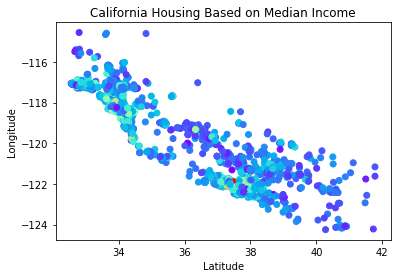

In [25]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.
x_axis = calhouse["Latitude"]
y_axis = calhouse["Longitude"]
size = calhouse["MedInc"]
plt.scatter(x_axis, y_axis, marker="o", c=size, cmap="rainbow")
plt.title("California Housing Based on Median Income")
plt.xlabel("Latitude")
plt.ylabel("Longitude")